<a href="https://colab.research.google.com/github/ebriggsjohnson/MSQM_Contest/blob/main/politics_sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A lot of research has been done into the impact the US president has on the stock market, and which party is better for the president. Typically these are partisan pieces, like https://www.jec.senate.gov/public/index.cfm/democrats/2024/10/the-u-s-economy-performs-better-under-democratic-presidents

https://retirementresearcher.com/are-republicans-or-democrats-better-for-the-stock-market/

https://www.cnbc.com/2024/11/07/chart-divided-us-government-historically-better-for-stocks.html

I'm doubtful first because I don't know how much power the president has over economic performance, especially something as finicky as the stock market. Second, there have really been so few presidents, I can't imagine this data has much statistical validity. But I am not certain. Are these claims spurious? It's always fun to compare to things that (we think) should certainly be spurious like president's heights, weight, and left-handededness to get a reality check.

I also want to apply some of the statistics knowledge we have learned in the program to something that everyone talks about, so I can appear clever at parties and job interviews.

S&P Data comes from from Prof. Damodaran's webesite
https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html

president's data is from
https://pages.uoregon.edu/dwilkins/data/presidents.csv
and
https://www.kaggle.com/datasets/harshitagpt/us-presidents

In [ ]:
# Mount my google drive and import the fiels
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

presidents = pd.read_csv('/content/drive/MyDrive/third_analytics_project/presidents_data_with_year.csv')
presidents_additional_info = pd.read_csv('/content/drive/MyDrive/third_analytics_project/presidents_additional_info.csv')
historical_returns = pd.read_excel('/content/drive/MyDrive/third_analytics_project/histretSP.xls',
                                   sheet_name="Returns by year",
                                   skiprows = 19)

display(presidents.head())
display(presidents_additional_info.head())
display(historical_returns.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0.0,1.0,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1.0,2.0,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2.0,3.0,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3.0,4.0,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4.0,5.0,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


,order,name,height(cm),party,weight(pounds),age_elected,hand,start_date,end_date
0,1,George Washington,189,Federalist,175,57,right,NaN,NaN
1,2,John Adams,170,Federalist,150,61,right,NaN,NaN
2,3,Thomas Jefferson,189,Democratic-Republican,174,57,right,NaN,NaN
3,4,James Madison,163,Democratic-Republican,100,57,right,NaN,NaN
4,5,James Monroe,183,Democratic-Republican,189,57,right,NaN,NaN


,Year,S&P 500 (includes dividends),US Small cap (bottom decile),3-month T.Bill,US T. Bond (10-year),Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,US Small cap (bottom decile) Cum Value,...,Gold,S&P 500 (includes dividends)3.1,US Small cap (bottom decile)22.1,3-month T.Bill4.1,US T. Bond5.1,Baa Corporate Bond2.1,Real Estate2.1,Gold2.1,Stocks minus T. Bills,Stocks minus T.Bonds
0,1928,0.438112,0.6215,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,159.910000,...,0.012676,145.493158,164.046492,104.285615,102.014834,104.426798,102.678084,101.267624,0.412075,0.434783
1,1929,-0.082979,-0.4608,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,86.223472,...,-0.007258,132.644508,87.939598,106.955564,105.685290,106.952789,99.981502,100.53266,-0.113913,-0.124291
2,1930,-0.251236,-0.4835,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,44.534423,...,0.069359,106.105182,48.524088,119.462059,118.033011,114.876878,102.219599,107.505474,-0.317010,-0.316913
3,1931,-0.438375,-0.4362,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,25.108508,...,-0.088971,65.713662,30.168622,134.778649,126.829091,106.815001,103.534271,97.940557,-0.508887,-0.455197
4,1932,-0.086424,0.2865,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,32.302095,...,0.351646,66.908619,43.256045,151.818576,153.776732,147.128135,103.312182,132.380976,-0.108245,-0.194288


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from datetime import datetime

# 1) load data
presidents = pd.read_csv('/content/drive/MyDrive/third_analytics_project/presidents_data_with_year.csv')
presidents_additional_info = pd.read_csv('/content/drive/MyDrive/third_analytics_project/presidents_additional_info.csv')
historical_returns = pd.read_excel('/content/drive/MyDrive/third_analytics_project/histretSP.xls',
                                 sheet_name="Returns by year", skiprows=19)

# 2) merge dfs
# Clean keys
presidents = presidents.dropna(subset=['S.No.']).copy()
presidents['S.No.'] = presidents['S.No.'].astype(int)
presidents_additional_info = presidents_additional_info.dropna(subset=['order']).copy()
presidents_additional_info['order'] = presidents_additional_info['order'].astype(int)

# Merge on S.No = order to get physical attributes
df_pres = pd.merge(presidents, presidents_additional_info, left_on='S.No.', right_on='order', how='inner')

# 3. Date Parsing & Trump 2025 Fix (biden was the last in the data I loaded)
df_pres['start_date'] = pd.to_datetime(df_pres['start'])
df_pres['end_date'] = pd.to_datetime(df_pres['end'], errors='coerce')

# Check if Trump (47th term) is missing. If the max order is 46 (Biden), add Trump.
if df_pres['order'].max() == 46:
    # Create a new row based on his previous term data (order 45) but updated for 2025
    trump_base = df_pres[df_pres['order'] == 45].iloc[0].copy()
    trump_base['S.No.'] = 47
    trump_base['order'] = 47
    trump_base['name'] = 'Donald Trump'
    trump_base['start_date'] = pd.Timestamp('2025-01-20')
    trump_base['end_date'] = pd.NaT # Ongoing
    trump_base['start'] = 'January 20, 2025'
    trump_base['age_elected'] = 78 # Approx age in 2025

    # Append to dataframe
    df_pres = pd.concat([df_pres, pd.DataFrame([trump_base])], ignore_index=True)

# Use age_elected for consistency
df_pres['Age'] = df_pres['age_elected']

# fix the yeras
# since a president's term ends in Jan, the year belongs to the NEXT president. e.g.,  in our model 2025 will be marked a Trump year
pres_year_rows = []

for idx, row in df_pres.iterrows():
    s_year = row['start_date'].year

    if pd.isnull(row['end_date']):
        # For current president, go up to 2025 (or current max in returns data)
        e_year = 2025
    else:
        e_year = row['end_date'].year
        # TRANSITION RULE: If term ends in January (month 1), they don't get that year.
        if row['end_date'].month <= 1:
            e_year -= 1

    # Generate range
    if e_year >= s_year:
        for y in range(s_year, e_year + 1):
            pres_year_rows.append({
                'Year': y,
                'President': row['name'],
                'Party': row['party_x'],
                'Height': row['height(cm)'],
                'Weight': row['weight(pounds)'],
                'Age': row['Age'],
                'Hand': row['hand']
            })

df_expanded = pd.DataFrame(pres_year_rows)


# 5. Merge with Returns
historical_returns['Year'] = pd.to_numeric(historical_returns['Year'], errors='coerce')
hist_ret = historical_returns.dropna(subset=['Year']).copy()
hist_ret['Year'] = hist_ret['Year'].astype(int)

# Identify return column safely and rename it
ret_col = [c for c in hist_ret.columns if 'S&P' in c or 'Return' in c][0]
hist_ret = hist_ret.rename(columns={ret_col: 'SP_Return'})

master_df = pd.merge(df_expanded, hist_ret[['Year', 'SP_Return']], on='Year', how='inner')

#finallly take a look to see if everything looks right
display(master_df.head())
display(master_df.tail())

,Year,President,Party,Height,Weight,Age,Hand,SP_Return
0,1928,Calvin Coolidge,Republican,178,148,51,right,0.438112
1,1929,Calvin Coolidge,Republican,178,148,51,right,-0.082979
2,1929,Herbert Hoover,Republican,182,187,54,left,-0.082979
3,1930,Herbert Hoover,Republican,182,187,54,left,-0.251236
4,1931,Herbert Hoover,Republican,182,187,54,left,-0.438375


,Year,President,Party,Height,Weight,Age,Hand,SP_Return
93,2021,Joe Biden,Democrat,183,178,78,right,0.284689
94,2022,Joe Biden,Democrat,183,178,78,right,-0.180375
95,2023,Joe Biden,Democrat,183,178,78,right,0.260607
96,2024,Joe Biden,Democrat,183,178,78,right,0.248786
97,2025,Donald Trump,Republican,188,239,78,right,0.177237


Just for fun, let's start by looking at whether a president's height, weight, and age have any correlation to stock market returns. I don't actually think this will matter, but you never know where funny spurious correlations will show up.

                            OLS Regression Results                            
Dep. Variable:              SP_Return   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.177
Method:                 Least Squares   F-statistic:                    0.1999
Date:                Fri, 16 Jan 2026   Prob (F-statistic):              0.895
Time:                        16:26:17   Log-Likelihood:                 20.698
No. Observations:                  17   AIC:                            -33.40
Df Residuals:                      13   BIC:                            -30.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4800      1.054     -0.455      0.6

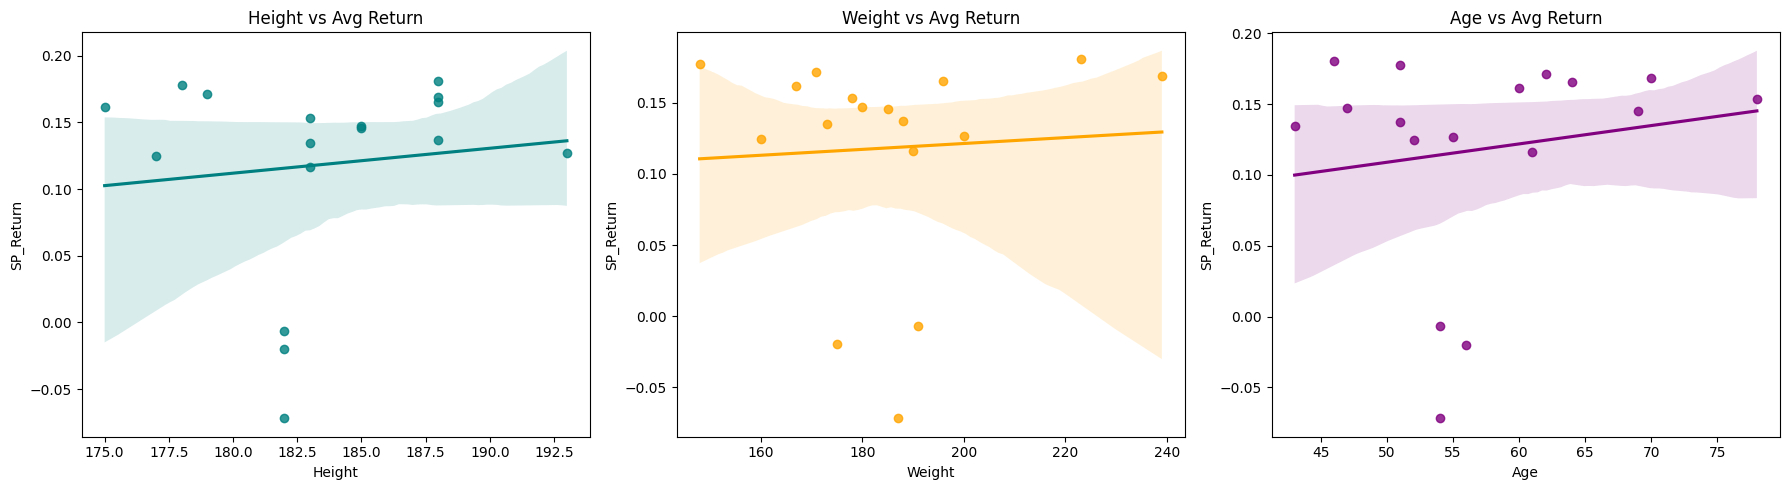

In [ ]:
# just for fun: Does presidents being big boys impact the S&P 500? -
# We aggregate by President to assume independence (one data point per president)
pres_summary = master_df.groupby('President').agg({
    'SP_Return': 'mean',
    'Height': 'first',
    'Weight': 'first',
    'Age': 'first',
    'Hand': 'first'
}).reset_index()

model = smf.ols("SP_Return ~ Height + Weight + Age", data=pres_summary).fit()
print(model.summary())

# Visualizations
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(data=pres_summary, x='Height', y='SP_Return', ax=ax[0], color='teal')
ax[0].set_title("Height vs Avg Return")
sns.regplot(data=pres_summary, x='Weight', y='SP_Return', ax=ax[1], color='orange')
ax[1].set_title("Weight vs Avg Return")
sns.regplot(data=pres_summary, x='Age', y='SP_Return', ax=ax[2], color='purple')
ax[2].set_title("Age vs Avg Return")
plt.tight_layout()
plt.show()

Unfortunately, big boy season does not seem to impact stock market returns.  Weak positive correlation with no statistical significanceVoters may prefer taller candidates, but the market does not.

Next, we are going to look at returns vs party affilliation. To give our alternative hypothesis the benefit of the doubt, let's look at the lagged variabels too. After all, it takes a while for policies to get implemented and cause an effect. Maybe the president's party doesn't impact returns this year, but a few years down the road

In [ ]:
import statsmodels.formula.api as smf

# We need a numeric "Dummy Variable" for the regression.
#  convert "Democrat" to 1 and "Republican" to 0.
# so  the coefficient we get will represent the "change when Party switches from Rep (0) to Dem (1)".
party_lags['is_Democrat'] = (party_lags['Group_Party'] == 'Democrat').astype(int)

print("--- Statistical Test: Does Party predict Returns? (Unlagged & Lagged) ---")
print("Model: Return =  beta_0 + Beta_1 * Party_is_Democrat")
print("(Coefficient 'Beta' = How much higher/lower returns are for Democrats vs Republicans)\n")

# We loop through 4 scenarios: Same year (T0), and 1, 2, 3 years later.
scenarios = [
    ('Ret_T0', 'Same Year (Unlagged)'),
    ('Ret_T1', '1 Year Later (Lag 1)'),
    ('Ret_T2', '2 Years Later (Lag 2)'),
    ('Ret_T3', '3 Years Later (Lag 3)')
]

for lag_col, label in scenarios:
    # We use Ordinary Least Squares (OLS) regression.
    # Formula: "Return ~ is_Democrat" means "Explain Return using Party".
    model = smf.ols(f"{lag_col} ~ is_Democrat", data=party_lags).fit()

    # gather all the coefficients
    # Coefficient: The average difference in return. If positive, Dems are higher.
    coef = model.params['is_Democrat']

    # gather all the p values
    p_val = model.pvalues['is_Democrat']

    # gather all the R^2
    r_sq = model.rsquared

    # Determine significance label for easy reading

    # Print nicely formatted results
    print(f"Scenario: {label}")
    print(f"  Effect Size (Coef): {coef:+.2%} (Difference: Dem - Rep)")
    print(f"  P-Value:            {p_val:.4f} ")
    print(f"  R-Squared:          {r_sq:.4f}")
    print("-" * 60)

--- Statistical Test: Does Party predict Returns? (Unlagged & Lagged) ---
Model: Return =  beta_0 + Beta_1 * Party_is_Democrat
(Coefficient 'Beta' = How much higher/lower returns are for Democrats vs Republicans)

Scenario: Same Year (Unlagged)
  Effect Size (Coef): +6.28% (Difference: Dem - Rep)
  P-Value:            0.1221 
  R-Squared:          0.0247
------------------------------------------------------------
Scenario: 1 Year Later (Lag 1)
  Effect Size (Coef): +1.02% (Difference: Dem - Rep)
  P-Value:            0.7988 
  R-Squared:          0.0007
------------------------------------------------------------
Scenario: 2 Years Later (Lag 2)
  Effect Size (Coef): +3.56% (Difference: Dem - Rep)
  P-Value:            0.3878 
  R-Squared:          0.0079
------------------------------------------------------------
Scenario: 3 Years Later (Lag 3)
  Effect Size (Coef): +2.45% (Difference: Dem - Rep)
  P-Value:            0.5347 
  R-Squared:          0.0042
-----------------------------

Across all time horizons (lags 0 through 3), the results are consistent: we observe a positive correlation with Democratic presidents, but it is statistically insignificant.

However, these models have inherent philosophical limitations. First, applying a frequentist framework to history is tricky. P-values ask, 'If we repeated this experiment infinite times, how often would we see this result?' But history is not a repeatable experiment; we only observe one single 'sample path' of reality (or at least I do).

Second, we face the counterfactual problem. We know how the market performed under the winner, but we can never observe how it would have performed had the loser won. Without that control group, and without accounting for massive external factors (like global wars or tech bubbles), it is difficult to isolate the president's specific impact.

At least I can now confidently say that I wouldn't try to make money by betting on overperformance when someone is president.